In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
#!pip install pydot>=1.2.4
import pydot
#!pip install pydotplus
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn import svm, datasets
from scipy import interp
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
features = pd.read_csv("picked_features.csv")

In [4]:
feature_list = list(features.columns)
feature_list

['percentage_reg_seats_activated',
 'bmt_product_groupIC/Suites',
 'bmt_product_groupLT Family',
 'bmt_product_groupOther',
 'uuid_age_days',
 'days_since_order_created',
 'uuid_seats_on_active_subs',
 'active_registered_seat_sum',
 'discount_rate',
 'srp_billed_usd',
 'parent_owner_uuid_count',
 'percentage_reg_seats_activated_channel_partner_csn',
 'sf_subscription_seats_billed',
 'deploymentNetworked',
 'deploymentSession Specific Network',
 'deploymentStandalone',
 'renewal_rate',
 'self_parented',
 'hier_industry_group_nameEDU',
 'hier_industry_group_nameM&E',
 'hier_industry_group_nameMFG',
 'hier_industry_group_nameMulti AEC Lead',
 'hier_industry_group_nameMulti EDU Lead',
 'hier_industry_group_nameMulti M&E Lead',
 'hier_industry_group_nameMulti MFG Lead',
 'hier_industry_group_nameMulti OTH Lead',
 'hier_industry_group_nameMulti Unknown Lead',
 'hier_industry_group_nameOTH',
 'hier_industry_group_nameUnknown',
 'discount_rate_channel_partner_csn',
 'percentage_reg_seats_activ

In [4]:
len(feature_list)

153

# Features and Targets and Convert Data to Arrays

In [5]:
# Labels are the values we want to predict
labels = np.array(features['activation_label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['activation_label', 'percentage_reg_seats_activated'], axis = 1)
#features= features.drop(car, axis = 1)

In [6]:
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [7]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 38)

# Gradient boosting

### 1. Sequential backward selection

In [ ]:
start = time.time()
kfold = model_selection.KFold(n_splits=10, random_state=38)
gbr = GradientBoostingClassifier(n_estimators=10, random_state=38)
results = model_selection.cross_val_score(gbr, test_features, test_labels, cv=kfold)
sfs = SFS(gbr, 
          k_features=15, 
          forward=False, 
          floating=True, 
          scoring='accuracy',
          cv=2,
          n_jobs=-1)

# Train the model on training data
sfs= sfs.fit(train_features, train_labels)

stop = time.time()

print(stop - start)
print('\nSequential Forward Selection (k=10):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 0.722])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

### 2. Sequential Forward Selection

In [41]:
start = time.time()
kfold = model_selection.KFold(n_splits=10, random_state=38)
gbr = GradientBoostingClassifier(n_estimators=50, random_state=38)
results = model_selection.cross_val_score(gbr, test_features, test_labels, cv=kfold)
sfs = SFS(gbr, 
          k_features=15, 
          forward=True, 
          floating=True, 
          scoring='accuracy',
          cv=2,
          n_jobs=-1)

# Train the model on training data
sfs= sfs.fit(train_features, train_labels)

stop = time.time()

print(stop - start)
print('\nSequential Forward Selection (k=10):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

1664.646432876587

Sequential Forward Selection (k=10):
(6, 10, 13, 19, 31, 34, 40, 43, 48, 53, 55, 59, 103, 107, 113)
CV Score:
0.719064873775


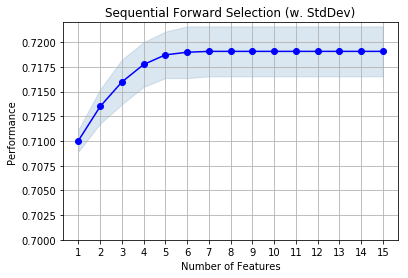

In [58]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.7, 0.722])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [43]:
feature = []
for index in sfs.k_feature_idx_:
    feature.append(feature_list[index])
feature

['active_registered_seat_sum',
 'percentage_reg_seats_activated_channel_partner_csn',
 'deploymentSession Specific Network',
 'hier_industry_group_nameMFG',
 'order_sourceSAP',
 'order_typeNew Acquisition',
 'bmt_offer_type_subgroupProduct Subs New SU',
 'country_codeAI',
 'country_codeAZ',
 'country_codeBO',
 'country_codeBW',
 'country_codeCM',
 'country_codeLV',
 'country_codeMT',
 'country_codeNG']

In [44]:
bullean_list = []
for i in feature_list:
    if i in feature:
        bullean_list.append(True)
    else:
        bullean_list.append(False)        

In [45]:
selections = np.array(bullean_list)
selected = features[:, selections]
selected

array([[ 1.        ,  0.91061453,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.86111111,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.91061453,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.        ,  0.91061453,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  0.91061453,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.91061453,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [46]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 38)

In [39]:
kfold = model_selection.KFold(n_splits=10, random_state=38)
gbr = GradientBoostingClassifier(n_estimators=50, random_state=38)
results = model_selection.cross_val_score(gbr, test_features, test_labels, cv=kfold)
gbr.fit(train_features, train_labels)
gbr.score(test_features, test_labels)

0.71242697822623469

In [40]:
print(results.mean())

0.707119476268


### 3.Sklearn feature selection

In [50]:
from sklearn.feature_selection import RFE

In [70]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=38)
rfe = RFE(gbc, 10)
fit = rfe.fit(train_features, train_labels)

In [72]:
predictions = fit.predict(test_features)
accuracy_score(predictions, test_labels)

0.70366436537440258

In [53]:
fit.support_

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
fit.ranking_

array([ 11,  35,   8,   1,   1,   1,   1,   1,   1,   2,   1,   6,   9,
        71,   1,   1,  62,  75,  31,  20,  30,  24,  50,  23,  29,  37,
       112,  26,   7,   3,   5, 121, 124, 123, 127, 128,  33,  64, 136,
        61,  10,  77,  83,  78,  57,  97,  99,  72, 104, 103,  70,  60,
       113, 115, 117, 129, 131, 133, 137, 101,  42,  58,  45, 106,  38,
        48,  28,  16, 105,  89,  90,  55,  25, 139, 141,  59, 126, 122,
       120,  84, 135,  74,  80,  79,  95,  94, 107,  53,  41, 111, 118,
       125, 132,  14, 142, 138,  47,  22,  36, 140,  17, 134, 130, 119,
       116, 114, 110,  92, 100, 102,  98,  21,  96,  15,  93,  56,  32,
        12,  81,  34,  40, 108, 109,  91,  18,  88,  73,  85,  44,  46,
        27,  86,  87,  76,  49,  82,  65,  66,  13,  54,  67,  19,  68,
        43,  39,  69,  52,   4,   1,  63,  51])

In [55]:
from itertools import compress
list(compress(feature_list, fit.support_.tolist()))

['bmt_product_groupOther',
 'uuid_age_days',
 'days_since_order_created',
 'uuid_seats_on_active_subs',
 'active_registered_seat_sum',
 'discount_rate',
 'parent_owner_uuid_count',
 'deploymentSession Specific Network',
 'deploymentStandalone',
 'car_pings_since_agreement_start_channel_partner_csn']